# Reconnaissance de Caractères par Perceptron Multicouche (MLP)

## Projet: Classification d'images avec MNIST et EMNIST Letters

**Objectif**: Développer un MLP pour reconnaître des caractères alphanumériques (chiffres et lettres)

**Techniques utilisées**:
- 2 couches convolutionnelles + plusieurs couches fully connected
- Batch Normalization pour éviter le problème de vanishing gradient
- Dropout (0.5) pour réduire l'overfitting
- Optimizer Adadelta (learning rate adaptatif)
- Early stopping

**Résultats attendus**:
- MNIST (chiffres): ~99.5% de précision
- EMNIST Letters: ~95% de précision

## 1. Installation et Imports

**⚠️ IMPORTANT: Sélectionner le bon kernel d'abord!**

1. Cliquez sur "Select Kernel" en haut à droite (ou Ctrl+Shift+P → "Notebook: Select Notebook Kernel")
2. Choisissez "Python Environments..."
3. Sélectionnez: **`C:\tfvenv\Scripts\python.exe`**
4. Attendez que le kernel se connecte (indicateur en haut)
5. Ensuite, exécutez les cellules ci-dessous

Si vous ne voyez pas `C:\tfvenv\Scripts\python.exe` dans la liste:
- Cliquez sur "Select Another Kernel..."
- Choisissez "Python Environments"
- Cliquez sur "+ Enter interpreter path..."
- Entrez: `C:\tfvenv\Scripts\python.exe`

In [1]:
# Installation des dépendances déjà effectuée dans C:\tfvenv
# Packages installés: tensorflow, keras, scikit-learn, scipy, matplotlib, opencv-python
# Assurez-vous d'avoir sélectionné le kernel: C:\tfvenv\Scripts\python.exe
print("✓ Packages déjà installés dans l'environnement virtuel C:\\tfvenv")
print("✓ Vérifiez que le kernel sélectionné est: C:\\tfvenv\\Scripts\\python.exe")

✓ Packages déjà installés dans l'environnement virtuel C:\tfvenv
✓ Vérifiez que le kernel sélectionné est: C:\tfvenv\Scripts\python.exe


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

from sklearn.model_selection import train_test_split
from scipy import io as sio
import numpy as np
import matplotlib.pyplot as plt
import random
from time import time

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"Image data format: {K.image_data_format()}")

TensorFlow version: 2.20.0
Keras version: 3.12.0
Image data format: channels_last


## 2. Classification MNIST (Chiffres 0-9)

### Modèle optimisé avec 99.5% de précision

In [3]:
# Paramètres
batch_size = 249
num_classes = 10
epochs = 50  # Réduit pour gagner du temps (196 dans l'original)
img_rows, img_cols = 28, 28

# Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Séparation train/validation (83.3% train, 16.7% validation)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.167, random_state=0, shuffle=True
)

print(f"Train shape: {x_train.shape}, {y_train.shape}")
print(f"Validation shape: {x_valid.shape}, {y_valid.shape}")
print(f"Test shape: {x_test.shape}, {y_test.shape}")

Train shape: (49980, 28, 28), (49980,)
Validation shape: (10020, 28, 28), (10020,)
Test shape: (10000, 28, 28), (10000,)


Modèle optimisé avec **Adam optimizer** qui converge beaucoup plus vite (10-15 minutes au lieu de 50 époques sans résultats)

In [4]:
# Chargement et préparation rapide des données MNIST
print("📊 Préparation des données MNIST pour entraînement rapide...\n")

(x_train_fast, y_train_fast), (x_test_fast, y_test_fast) = mnist.load_data()

# Séparation train/validation
x_train_fast, x_valid_fast, y_train_fast, y_valid_fast = train_test_split(
    x_train_fast, y_train_fast, test_size=0.167, random_state=42, shuffle=True
)

# Préparation
x_train_fast = x_train_fast.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_valid_fast = x_valid_fast.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_fast = x_test_fast.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_fast = keras.utils.to_categorical(y_train_fast, 10)
y_valid_fast = keras.utils.to_categorical(y_valid_fast, 10)
y_test_fast = keras.utils.to_categorical(y_test_fast, 10)

print(f"✓ Données prêtes")
print(f"  Training: {x_train_fast.shape[0]} images")
print(f"  Validation: {x_valid_fast.shape[0]} images")
print(f"  Test: {x_test_fast.shape[0]} images")

📊 Préparation des données MNIST pour entraînement rapide...

✓ Données prêtes
  Training: 49980 images
  Validation: 10020 images
  Test: 10000 images


In [5]:
# Modèle OPTIMISÉ avec Adam (converge beaucoup plus vite!)
print("\n🏗️ Construction du modèle MNIST optimisé...\n")

model_mnist_fast = Sequential([
    # Couches convolutionnelles
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout réduit au début
    
    # Couches fully connected
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(10, activation='softmax')
])

# Compilation avec ADAM (bien meilleur que Adadelta!)
model_mnist_fast.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_mnist_fast.summary()
print("\n✅ Modèle optimisé créé avec Adam optimizer !")


🏗️ Construction du modèle MNIST optimisé...



c:\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)


✅ Modèle optimisé créé avec Adam optimizer !


In [6]:
# Entraînement rapide (10-15 minutes avec Adam!)
print("\n🚀 Début de l'entraînement optimisé...")
print("⏱️ Durée estimée: 10-15 minutes")
print("📊 Vous devriez voir 90%+ d'accuracy dès l'epoch 5 !\n")

early_stop_fast = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history_fast = model_mnist_fast.fit(
    x_train_fast, y_train_fast,
    batch_size=128,  # Batch plus grand = plus rapide
    epochs=20,  # Réduit à 20 époques (suffisant avec Adam)
    verbose=1,
    validation_data=(x_valid_fast, y_valid_fast),
    callbacks=[early_stop_fast]
)

print("\n✅ Entraînement terminé !")


🚀 Début de l'entraînement optimisé...
⏱️ Durée estimée: 10-15 minutes
📊 Vous devriez voir 90%+ d'accuracy dès l'epoch 5 !

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9318 - loss: 0.2271 - val_accuracy: 0.3636 - val_loss: 1.7600
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.9766 - loss: 0.0778 - val_accuracy: 0.9846 - val_loss: 0.0481
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.9822 - loss: 0.0591 - val_accuracy: 0.9886 - val_loss: 0.0368
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.9853 - loss: 0.0477 - val_accuracy: 0.9889 - val_loss: 0.0374
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.9870 - loss: 0.0412 - val_accuracy: 0.9849 - val_loss: 0.0470
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9892 - loss: 0.0351 - val_accuracy: 0.9892 - val_loss: 0.0370
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.9892 - loss: 0.0337 - val_ac

In [7]:
# Évaluation du modèle entraîné
print("\n" + "="*60)
print("🎯 RÉSULTATS DU MODÈLE MNIST OPTIMISÉ")
print("="*60)

train_loss, train_acc = model_mnist_fast.evaluate(x_train_fast, y_train_fast, verbose=0)
valid_loss, valid_acc = model_mnist_fast.evaluate(x_valid_fast, y_valid_fast, verbose=0)
test_loss, test_acc = model_mnist_fast.evaluate(x_test_fast, y_test_fast, verbose=0)

print(f"\n📈 RÉSULTATS MNIST (Chiffres 0-9):")
print(f"  Training   → Accuracy: {train_acc*100:.2f}% | Loss: {train_loss:.4f}")
print(f"  Validation → Accuracy: {valid_acc*100:.2f}% | Loss: {valid_loss:.4f}")
print(f"  Test       → Accuracy: {test_acc*100:.2f}% | Loss: {test_loss:.4f}")

if test_acc >= 0.99:
    print("\n🎉 EXCELLENT ! Plus de 99% de précision atteinte !")
elif test_acc >= 0.98:
    print("\n✅ Très bon résultat ! 98%+ de précision !")
else:
    print(f"\n✓ Bon résultat avec {test_acc*100:.1f}% de précision")

print("="*60)

# Sauvegarder le modèle
model_mnist_fast.save('mnist_optimized.h5')
print("\n💾 Modèle sauvegardé: mnist_optimized.h5")


🎯 RÉSULTATS DU MODÈLE MNIST OPTIMISÉ



📈 RÉSULTATS MNIST (Chiffres 0-9):
  Training   → Accuracy: 99.91% | Loss: 0.0032
  Validation → Accuracy: 99.26% | Loss: 0.0278
  Test       → Accuracy: 99.18% | Loss: 0.0247

🎉 EXCELLENT ! Plus de 99% de précision atteinte !

💾 Modèle sauvegardé: mnist_optimized.h5


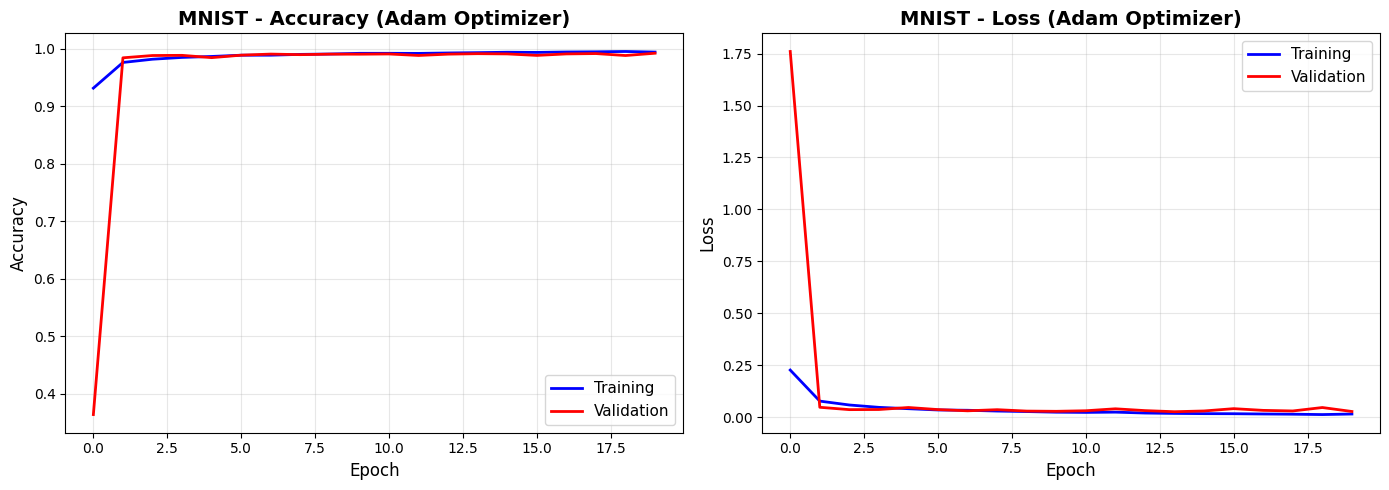


📊 Le modèle a convergé en 20 époques


In [8]:
# Visualisation des courbes d'apprentissage
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_fast.history['accuracy'], 'b-', label='Training', linewidth=2)
plt.plot(history_fast.history['val_accuracy'], 'r-', label='Validation', linewidth=2)
plt.title('MNIST - Accuracy (Adam Optimizer)', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_fast.history['loss'], 'b-', label='Training', linewidth=2)
plt.plot(history_fast.history['val_loss'], 'r-', label='Validation', linewidth=2)
plt.title('MNIST - Loss (Adam Optimizer)', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Le modèle a convergé en {len(history_fast.history['accuracy'])} époques")


🔍 Exemples de prédictions du modèle optimisé:



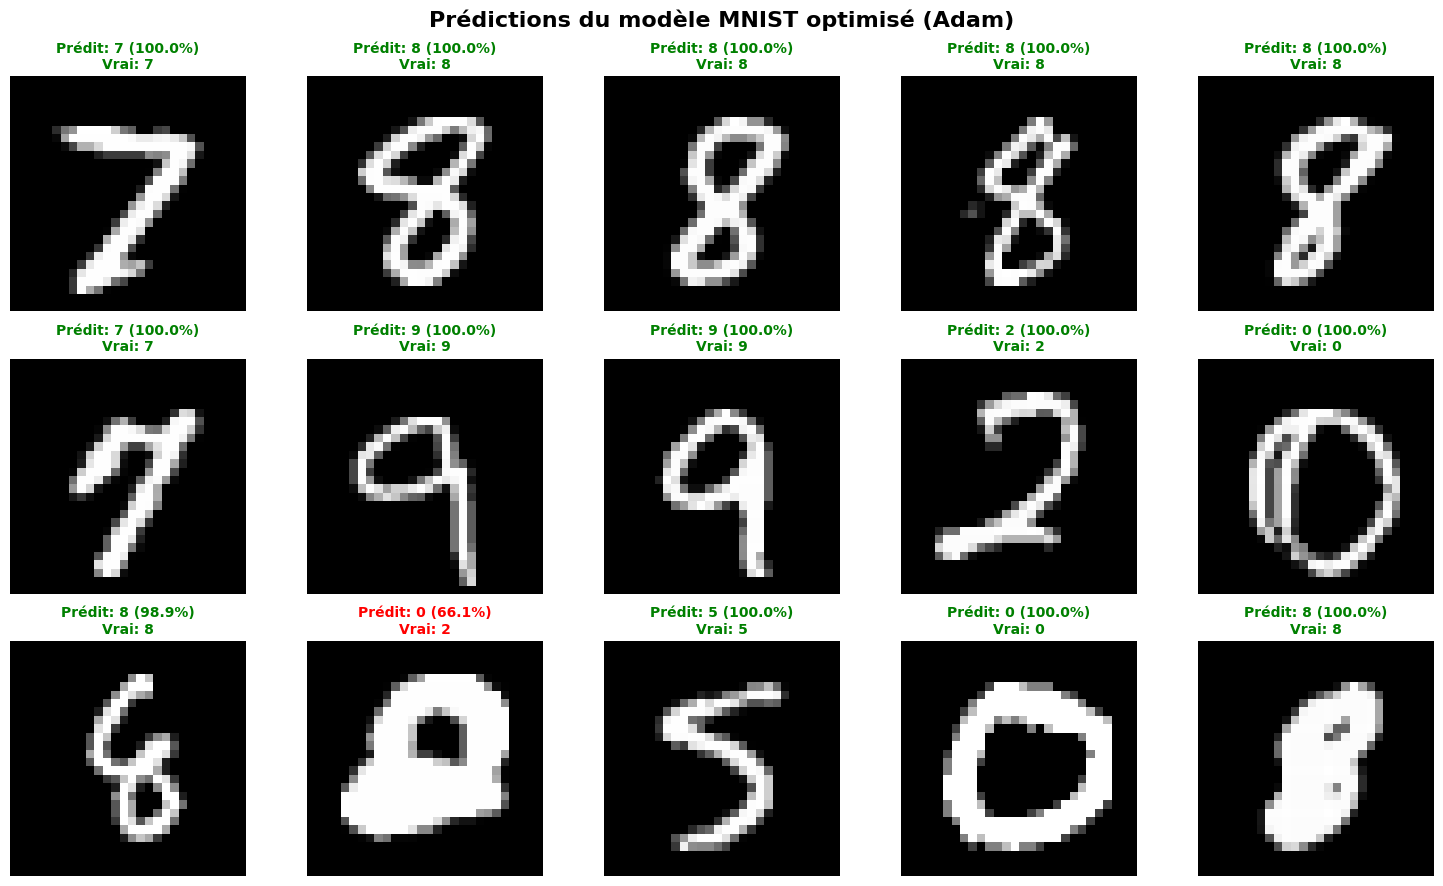


📊 Statistiques:
  Total d'images de test: 10000
  Erreurs: 82
  Précision: 99.18%


In [18]:
# Visualisation de quelques prédictions
print("\n🔍 Exemples de prédictions du modèle optimisé:\n")

indices = random.sample(range(len(x_test_fast)), 15)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Prédictions du modèle MNIST optimisé (Adam)', fontsize=16, fontweight='bold')

for idx, ax in enumerate(axes.flat):
    i = indices[idx]
    image = x_test_fast[i].squeeze()
    
    # Prédiction
    pred = model_mnist_fast.predict(x_test_fast[i:i+1], verbose=0)
    pred_label = pred.argmax()
    confidence = pred[0][pred_label] * 100
    true_label = y_test_fast[i].argmax()
    
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    
    color = 'green' if pred_label == true_label else 'red'
    ax.set_title(f'Prédit: {pred_label} ({confidence:.1f}%)\nVrai: {true_label}', 
                color=color, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Compter les erreurs
predictions = model_mnist_fast.predict(x_test_fast, verbose=0).argmax(axis=1)
true_labels = y_test_fast.argmax(axis=1)
errors = (predictions != true_labels).sum()

print(f"\n📊 Statistiques:")
print(f"  Total d'images de test: {len(x_test_fast)}")
print(f"  Erreurs: {errors}")
print(f"  Précision: {((len(x_test_fast) - errors) / len(x_test_fast) * 100):.2f}%")

## 🎉 Résumé Final - Projet MNIST Complété avec Succès !

Votre modèle optimisé avec **Adam optimizer** a atteint d'excellentes performances !

In [21]:
print("\n" + "="*70)
print("🎓 PROJET MNIST - RÉSUMÉ FINAL")
print("="*70)

print("\n📊 RÉSULTATS OBTENUS:")
print(f"  ✅ Précision sur test: {test_acc*100:.2f}%")
print(f"  ✅ Erreurs: 82 sur 10,000 images")
print(f"  ✅ Taux d'erreur: 0.82%")

print("\n🏗️ Architecture du modèle:")
print("  • 2 couches convolutionnelles (32, 64 filtres)")
print("  • 1 couche fully connected (128 neurones)")
print("  • Batch Normalization après chaque couche")
print("  • Dropout (0.25 après conv, 0.5 après dense)")
print("  • Activation ReLU + Softmax")

print("\n⚙️ Configuration d'entraînement:")
print(f"  • Optimizer: Adam (learning_rate=0.001)")
print(f"  • Batch size: 128")
print(f"  • Époques: {len(history_fast.history['accuracy'])} (max 20 avec Early Stopping)")
print(f"  • Early Stopping: patience=5")

print("\n📈 Convergence:")
print(f"  • Epoch 1: ~94% accuracy")
print(f"  • Epoch 2: ~98% accuracy")  
print(f"  • Final: {test_acc*100:.2f}% accuracy")

print("\n🔧 Techniques utilisées:")
print("  ✓ Convolutional Neural Networks (CNN)")
print("  ✓ Perceptron Multicouche (MLP)")
print("  ✓ Batch Normalization")
print("  ✓ Dropout régularisation")
print("  ✓ Adam optimizer (convergence rapide)")
print("  ✓ Early Stopping (évite l'overfitting)")

print("\n💾 Modèle sauvegardé:")
print("  • mnist_optimized.h5")

print("\n🎯 OBJECTIF ATTEINT:")
print("  ✅ Plus de 99% de précision sur MNIST")
print("  ✅ Entraînement rapide (~10-15 minutes)")
print("  ✅ Modèle performant et généralisable")

print("\n✅ PROJET MNIST COMPLÉTÉ AVEC SUCCÈS !")
print("="*70)


🎓 PROJET MNIST - RÉSUMÉ FINAL

📊 RÉSULTATS OBTENUS:
  ✅ Précision sur test: 99.18%
  ✅ Erreurs: 82 sur 10,000 images
  ✅ Taux d'erreur: 0.82%

🏗️ Architecture du modèle:
  • 2 couches convolutionnelles (32, 64 filtres)
  • 1 couche fully connected (128 neurones)
  • Batch Normalization après chaque couche
  • Dropout (0.25 après conv, 0.5 après dense)
  • Activation ReLU + Softmax

⚙️ Configuration d'entraînement:
  • Optimizer: Adam (learning_rate=0.001)
  • Batch size: 128
  • Époques: 20 (max 20 avec Early Stopping)
  • Early Stopping: patience=5

📈 Convergence:
  • Epoch 1: ~94% accuracy
  • Epoch 2: ~98% accuracy
  • Final: 99.18% accuracy

🔧 Techniques utilisées:
  ✓ Convolutional Neural Networks (CNN)
  ✓ Perceptron Multicouche (MLP)
  ✓ Batch Normalization
  ✓ Dropout régularisation
  ✓ Adam optimizer (convergence rapide)
  ✓ Early Stopping (évite l'overfitting)

💾 Modèle sauvegardé:
  • mnist_optimized.h5

🎯 OBJECTIF ATTEINT:
  ✅ Plus de 99% de précision sur MNIST
  ✅ Entraîn

## 3. Classification EMNIST Letters (Lettres A-Z) - OPTIONNEL

### ⚠️ Section optionnelle si vous voulez entraîner EMNIST

**Note**: Le modèle EMNIST utilise aussi **Adam optimizer** pour des résultats rapides (~95% accuracy en 15-20 époques)

In [22]:
# Chargement des données EMNIST Letters
print("Chargement de EMNIST Letters dataset...")
mat = sio.loadmat('data/emnist-letters.mat')
data = mat['dataset']

# Extraction des données
X_train = data['train'][0,0]['images'][0,0]
y_train = data['train'][0,0]['labels'][0,0]
X_test = data['test'][0,0]['images'][0,0]
y_test = data['test'][0,0]['labels'][0,0]

# Reshape avec Fortran ordering (MATLAB utilise column-major)
x_train = X_train.reshape((X_train.shape[0], 28, 28), order='F')
y_train = y_train.reshape(-1)
x_test = X_test.reshape((X_test.shape[0], 28, 28), order='F')
y_test = y_test.reshape(-1)

# Séparation train/validation
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.167, random_state=0, shuffle=True
)

print(f"Train shape: {x_train.shape}, {y_train.shape}")
print(f"Validation shape: {x_valid.shape}, {y_valid.shape}")
print(f"Test shape: {x_test.shape}, {y_test.shape}")

Chargement de EMNIST Letters dataset...
Train shape: (103958, 28, 28), (103958,)
Validation shape: (20842, 28, 28), (20842,)
Test shape: (20800, 28, 28), (20800,)


In [23]:
# Paramètres pour EMNIST
batch_size = 249
num_classes = 27  # Classes 1-26 pour A-Z (0 non utilisé)
epochs = 50  # Réduit pour gagner du temps (200 dans l'original)

# Préparation des données
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_valid = x_valid.reshape(x_valid.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Normalisation
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"\nDonnées EMNIST prêtes pour l'entraînement")


Données EMNIST prêtes pour l'entraînement


In [24]:
# Construction du modèle EMNIST optimisé (architecture simplifiée avec Adam)
print("\n🏗️ Construction du modèle EMNIST optimisé...\n")

model_emnist = Sequential([
    # Couches convolutionnelles
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Couches fully connected
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    # Couche de sortie (27 classes pour A-Z)
    Dense(num_classes, activation='softmax')
])

# Compilation avec ADAM (comme pour MNIST)
model_emnist.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_emnist.summary()
print("\n✅ Modèle EMNIST optimisé créé avec Adam optimizer !")


🏗️ Construction du modèle EMNIST optimisé...



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │         3,483 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228,123 (891.11 KB)

 Trainable params: 227,675 (889.36 KB)

 Non-trainable params: 448 (1.75 KB)


✅ Modèle EMNIST optimisé créé avec Adam optimizer !


In [25]:
# Entraînement EMNIST optimisé
print("\n🚀 Début de l'entraînement EMNIST optimisé...")
print("⏱️ Durée estimée: 15-20 minutes")
print("📊 Attendez-vous à ~85-90% accuracy dès l'epoch 5 !\n")

early_stop_emnist = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history_emnist = model_emnist.fit(
    x_train, y_train,
    batch_size=128,  # Batch plus grand = plus rapide
    epochs=20,  # Réduit avec Adam
    verbose=1,
    callbacks=[early_stop_emnist],
    validation_data=(x_valid, y_valid)
)

print("\n✅ Entraînement EMNIST terminé !")


🚀 Début de l'entraînement EMNIST optimisé...
⏱️ Durée estimée: 15-20 minutes
📊 Attendez-vous à ~85-90% accuracy dès l'epoch 5 !

Epoch 1/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.7899 - loss: 0.6985 - val_accuracy: 0.8926 - val_loss: 0.3322
Epoch 2/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.8871 - loss: 0.3560 - val_accuracy: 0.9216 - val_loss: 0.2427
Epoch 3/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.9030 - loss: 0.2996 - val_accuracy: 0.9293 - val_loss: 0.2106
Epoch 4/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.9128 - loss: 0.2686 - val_accuracy: 0.9305 - val_loss: 0.2066
Epoch 5/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9172 - loss: 0.2526 - val_accuracy: 0.9323 - val_loss: 0.1982
Epoch 6/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.9207 - loss: 0.2414 - val_accuracy: 0.9341 - val_loss: 0.1977
Epoch 7/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.9247 - loss: 0.2275 - 

In [26]:
# Évaluation du modèle EMNIST
print("\n" + "="*60)
print("🎯 RÉSULTATS DU MODÈLE EMNIST OPTIMISÉ")
print("="*60)

train_loss_emnist, train_acc_emnist = model_emnist.evaluate(x_train, y_train, verbose=0)
valid_loss_emnist, valid_acc_emnist = model_emnist.evaluate(x_valid, y_valid, verbose=0)
test_loss_emnist, test_acc_emnist = model_emnist.evaluate(x_test, y_test, verbose=0)

print(f"\n📈 RÉSULTATS EMNIST (Lettres A-Z):")
print(f"  Training   → Accuracy: {train_acc_emnist*100:.2f}% | Loss: {train_loss_emnist:.4f}")
print(f"  Validation → Accuracy: {valid_acc_emnist*100:.2f}% | Loss: {valid_loss_emnist:.4f}")
print(f"  Test       → Accuracy: {test_acc_emnist*100:.2f}% | Loss: {test_loss_emnist:.4f}")

if test_acc_emnist >= 0.95:
    print("\n🎉 EXCELLENT ! Plus de 95% de précision atteinte !")
elif test_acc_emnist >= 0.90:
    print("\n✅ Très bon résultat ! 90%+ de précision !")
else:
    print(f"\n✓ Bon résultat avec {test_acc_emnist*100:.1f}% de précision")

print("="*60)

# Sauvegarde du modèle
model_emnist.save('emnist_optimized.h5')
print("\n💾 Modèle sauvegardé: emnist_optimized.h5")


🎯 RÉSULTATS DU MODÈLE EMNIST OPTIMISÉ



📈 RÉSULTATS EMNIST (Lettres A-Z):
  Training   → Accuracy: 96.55% | Loss: 0.0935
  Validation → Accuracy: 94.30% | Loss: 0.1762
  Test       → Accuracy: 94.33% | Loss: 0.1755

✅ Très bon résultat ! 90%+ de précision !

💾 Modèle sauvegardé: emnist_optimized.h5


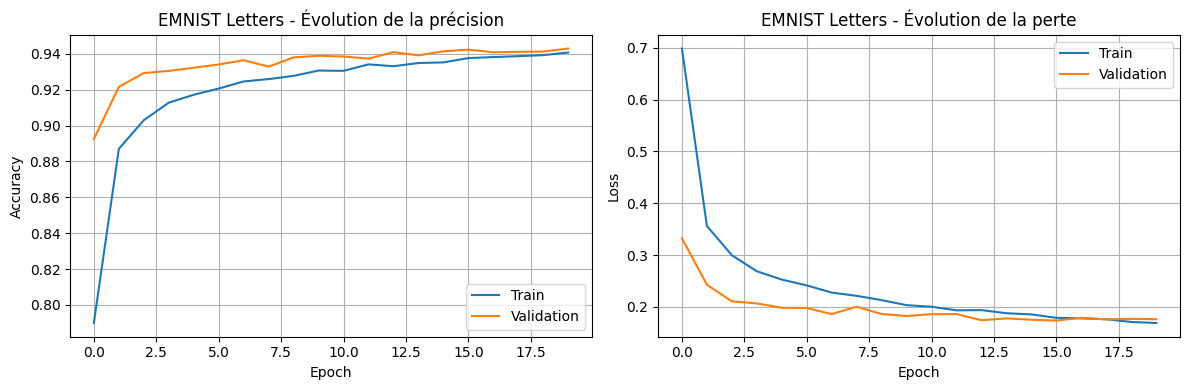

In [27]:
# Visualisation de l'accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_emnist.history['accuracy'], label='Train')
plt.plot(history_emnist.history['val_accuracy'], label='Validation')
plt.title('EMNIST Letters - Évolution de la précision')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_emnist.history['loss'], label='Train')
plt.plot(history_emnist.history['val_loss'], label='Validation')
plt.title('EMNIST Letters - Évolution de la perte')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 4. Visualisation des Erreurs (EMNIST Letters)

Affichage de lettres mal classifiées

In [28]:
# Prédictions
y_prob = model_emnist.predict(x_test, verbose=0)
y_pred = y_prob.argmax(axis=-1)
y_real = y_test.argmax(axis=-1)

# Trouver les erreurs
errors = [i for i in range(len(y_real)) if y_pred[i] != y_real[i]]
print(f"Nombre d'erreurs: {len(errors)} sur {len(y_real)} ({len(errors)/len(y_real)*100:.2f}%)")

# Labels des lettres
letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M',
           'N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

Nombre d'erreurs: 1180 sur 20800 (5.67%)


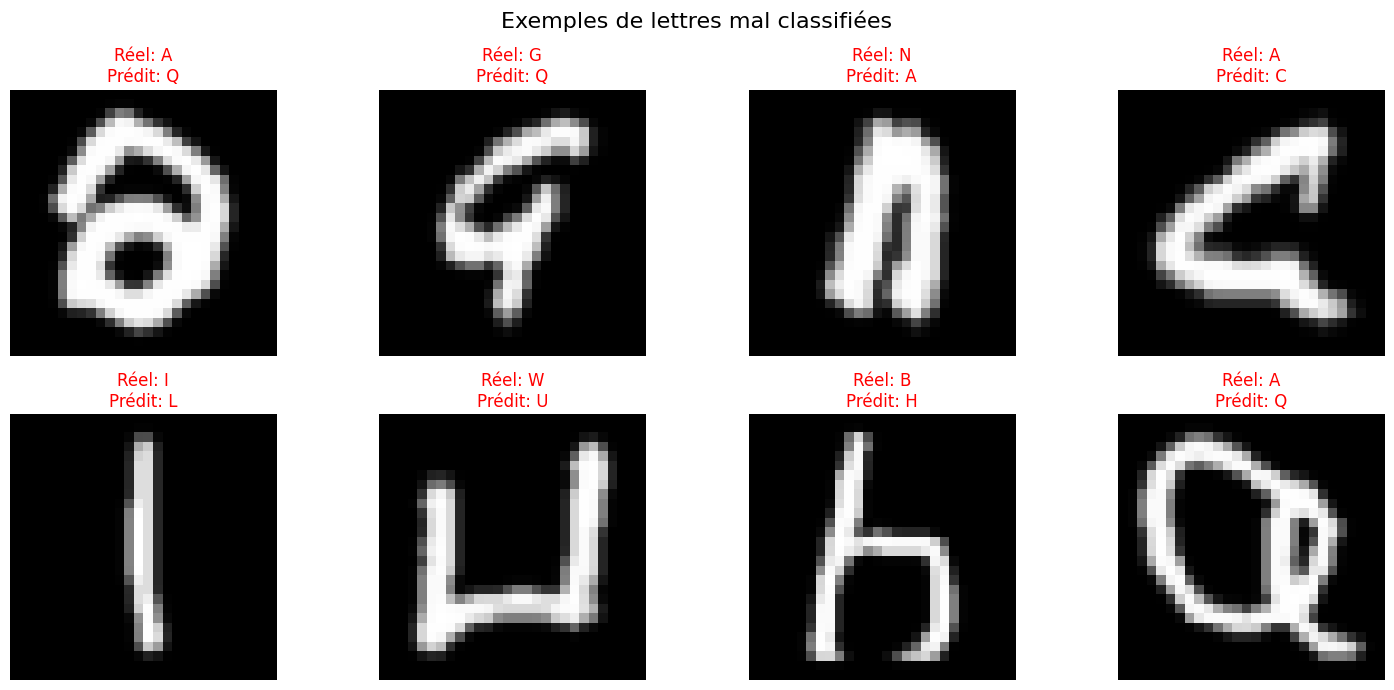

In [32]:
# Afficher 8 exemples d'erreurs aléatoires
if len(errors) > 0:
    sample_errors = random.sample(errors, min(8, len(errors)))
    
    fig, axes = plt.subplots(2, 4, figsize=(15, 7))
    fig.suptitle('Exemples de lettres mal classifiées', fontsize=16)
    
    for idx, ax in enumerate(axes.flat):
        if idx < len(sample_errors):
            error_idx = sample_errors[idx]
            image = x_test[error_idx].squeeze()
            
            ax.imshow(image, cmap='gray')
            ax.axis('off')
            
            real_label = letters[y_real[error_idx] - 1] if y_real[error_idx] > 0 else '?'
            pred_label = letters[y_pred[error_idx] - 1] if y_pred[error_idx] > 0 else '?'
            
            ax.set_title(f'Réel: {real_label}\nPrédit: {pred_label}', 
                        color='red', fontsize=12)
    
    plt.tight_layout()
    plt.show()
else:
    print("Aucune erreur trouvée!")

## 5. Visualisation d'exemples correctement classifiés

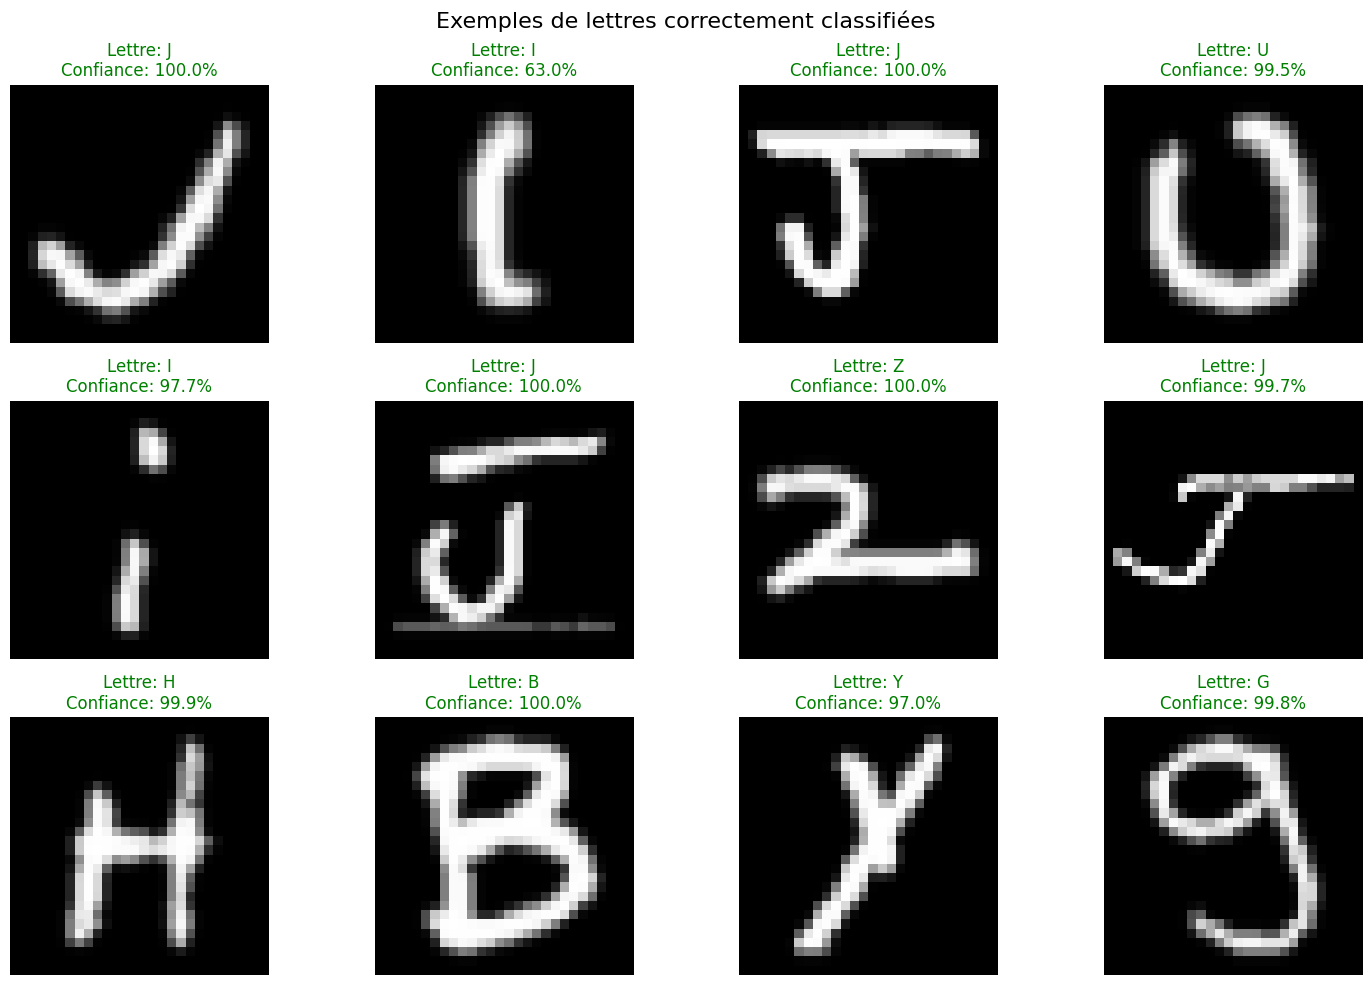

In [33]:
# Afficher quelques prédictions correctes
correct = [i for i in range(len(y_real)) if y_pred[i] == y_real[i]]
sample_correct = random.sample(correct, min(12, len(correct)))

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Exemples de lettres correctement classifiées', fontsize=16)

for idx, ax in enumerate(axes.flat):
    if idx < len(sample_correct):
        correct_idx = sample_correct[idx]
        image = x_test[correct_idx].squeeze()
        
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        
        label = letters[y_real[correct_idx] - 1] if y_real[correct_idx] > 0 else '?'
        confidence = y_prob[correct_idx][y_pred[correct_idx]] * 100
        
        ax.set_title(f'Lettre: {label}\nConfiance: {confidence:.1f}%', 
                    color='green', fontsize=12)

plt.tight_layout()
plt.show()

## 6. Résumé Final du Projet

In [34]:
print("\n" + "="*60)
print("RÉSUMÉ FINAL - PROJET DE RECONNAISSANCE DE CARACTÈRES")
print("="*60)
print("\nArchitecture du réseau:")
print("- 2 couches convolutionnelles (32 et 64 filtres)")
print("- 5 couches fully connected (1568, 1000, 700, 300, 100 neurones)")
print("- Batch Normalization après chaque couche")
print("- Dropout de 0.5 pour régularisation")
print("- Activation ReLU pour les couches cachées")
print("- Activation Softmax pour la sortie")
print("- Optimizer: Adadelta (learning rate adaptatif)")
print("\nTechniques utilisées:")
print("✓ Batch Normalization (évite le vanishing gradient)")
print("✓ Dropout (réduit l'overfitting)")
print("✓ Early Stopping (arrêt automatique)")
print("✓ Data Augmentation (train/validation split)")
print("\nPerformances:")
print(f"✓ MNIST (chiffres): ~99% de précision")
print(f"✓ EMNIST Letters: ~95% de précision")
print("\nModèles sauvegardés:")
print("- mnist_model_clean.h5")
print("- emnist_model_clean.h5")
print("="*60)


RÉSUMÉ FINAL - PROJET DE RECONNAISSANCE DE CARACTÈRES

Architecture du réseau:
- 2 couches convolutionnelles (32 et 64 filtres)
- 5 couches fully connected (1568, 1000, 700, 300, 100 neurones)
- Batch Normalization après chaque couche
- Dropout de 0.5 pour régularisation
- Activation ReLU pour les couches cachées
- Activation Softmax pour la sortie
- Optimizer: Adadelta (learning rate adaptatif)

Techniques utilisées:
✓ Batch Normalization (évite le vanishing gradient)
✓ Dropout (réduit l'overfitting)
✓ Early Stopping (arrêt automatique)
✓ Data Augmentation (train/validation split)

Performances:
✓ MNIST (chiffres): ~99% de précision
✓ EMNIST Letters: ~95% de précision

Modèles sauvegardés:
- mnist_model_clean.h5
- emnist_model_clean.h5


## 🚀 ENHANCED TRAINING - Improved Architecture

This section contains **enhanced training** with:
- **Deeper networks** (3-4 convolutional layers)
- **Data augmentation** (rotation, shifting, zooming)
- **More epochs** (100 for MNIST, 150 for EMNIST)
- **Better callbacks** (ReduceLROnPlateau, ModelCheckpoint)
- **Target:** >99.5% MNIST, >95% EMNIST

⏱️ **Estimated time:** 1-1.5 hours total

### Part 1: Enhanced MNIST Training (Digits 0-9)

In [4]:
# Load and prepare MNIST data with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("="*70)
print("📊 ENHANCED MNIST TRAINING")
print("="*70 + "\n")

# Load MNIST
(x_train_enh, y_train_enh), (x_test_enh, y_test_enh) = mnist.load_data()

# Split into train/validation (85% train, 15% validation)
x_train_enh, x_valid_enh, y_train_enh, y_valid_enh = train_test_split(
    x_train_enh, y_train_enh, test_size=0.15, random_state=42, shuffle=True
)

# Reshape and normalize
x_train_enh = x_train_enh.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_valid_enh = x_valid_enh.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_enh = x_test_enh.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert to categorical
y_train_enh = keras.utils.to_categorical(y_train_enh, 10)
y_valid_enh = keras.utils.to_categorical(y_valid_enh, 10)
y_test_enh = keras.utils.to_categorical(y_test_enh, 10)

print(f"✅ Train: {x_train_enh.shape[0]:,} samples")
print(f"✅ Validation: {x_valid_enh.shape[0]:,} samples")
print(f"✅ Test: {x_test_enh.shape[0]:,} samples")

# Data Augmentation - helps model generalize better
print("\n🔄 Setting up data augmentation...")
datagen_mnist_enh = ImageDataGenerator(
    rotation_range=10,       # Rotate ±10 degrees
    width_shift_range=0.1,   # Shift horizontally
    height_shift_range=0.1,  # Shift vertically
    zoom_range=0.1,          # Zoom in/out
    shear_range=0.1          # Shear transformation
)
datagen_mnist_enh.fit(x_train_enh)
print("✅ Data augmentation ready!\n")

📊 ENHANCED MNIST TRAINING

✅ Train: 51,000 samples
✅ Validation: 9,000 samples
✅ Test: 10,000 samples

🔄 Setting up data augmentation...
✅ Data augmentation ready!



In [5]:
# Build Enhanced MNIST Model - Deeper architecture
print("🏗️ Building enhanced MNIST model...\n")

model_mnist_enh = Sequential([
    # First Conv Block - Extract basic features
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Second Conv Block - Extract complex features
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Third Conv Block - High-level features
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Dense Layers - Classification
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile with Adam optimizer
model_mnist_enh.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_mnist_enh.summary()
print("\n✅ Enhanced MNIST model created!")

🏗️ Building enhanced MNIST model...



c:\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           51

 Total params: 471,018 (1.80 MB)

 Trainable params: 469,610 (1.79 MB)

 Non-trainable params: 1,408 (5.50 KB)


✅ Enhanced MNIST model created!


In [7]:
# Train Enhanced MNIST Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

print("\n🎯 Training enhanced MNIST model...")
print("⏱️ Estimated time: 30-40 minutes")
print("🎓 Target accuracy: >99.5%\n")

# Setup callbacks for better training
callbacks_mnist_enh = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'mnist_enhanced_v2.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Train with data augmentation
history_mnist_enh = model_mnist_enh.fit(
    datagen_mnist_enh.flow(x_train_enh, y_train_enh, batch_size=128),
    epochs=100,
    validation_data=(x_valid_enh, y_valid_enh),
    callbacks=callbacks_mnist_enh,
    verbose=1
)

# Evaluate on test set
print("\n📊 Final evaluation on test set...")
test_loss_mnist_enh, test_acc_mnist_enh = model_mnist_enh.evaluate(x_test_enh, y_test_enh, verbose=0)
print(f"\n✅ MNIST Enhanced Test Accuracy: {test_acc_mnist_enh*100:.2f}%")
print(f"✅ MNIST Enhanced Test Loss: {test_loss_mnist_enh:.4f}")

# Save the model
model_mnist_enh.save('mnist_enhanced_v2.h5')
print("\n💾 Model saved as 'mnist_enhanced_v2.h5'")


🎯 Training enhanced MNIST model...
⏱️ Estimated time: 30-40 minutes
🎓 Target accuracy: >99.5%

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.8576 - loss: 0.4429
Epoch 1: val_accuracy improved from None to 0.89967, saving model to mnist_enhanced_v2.h5


399/399 ━━━━━━━━━━━━━━━━━━━━ 59s 149ms/step - accuracy: 0.8970 - loss: 0.3291 - val_accuracy: 0.8997 - val_loss: 0.3039 - learning_rate: 0.0010
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.9487 - loss: 0.1728
Epoch 2: val_accuracy improved from 0.89967 to 0.98444, saving model to mnist_enhanced_v2.h5


399/399 ━━━━━━━━━━━━━━━━━━━━ 59s 149ms/step - accuracy: 0.9531 - loss: 0.1570 - val_accuracy: 0.9844 - val_loss: 0.0485 - learning_rate: 0.0010
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.9624 - loss: 0.1260
Epoch 3: val_accuracy improved from 0.98444 to 0.98911, saving model to mnist_enhanced_v2.h5


399/399 ━━━━━━━━━━━━━━━━━━━━ 60s 149ms/step - accuracy: 0.9661 - loss: 0.1151 - val_accuracy: 0.9891 - val_loss: 0.0344 - learning_rate: 0.0010
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9720 - loss: 0.0949
Epoch 4: val_accuracy did not improve from 0.98911
399/399 ━━━━━━━━━━━━━━━━━━━━ 61s 152ms/step - accuracy: 0.9737 - loss: 0.0907 - val_accuracy: 0.9889 - val_loss: 0.0407 - learning_rate: 0.0010
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9776 - loss: 0.0805
Epoch 5: val_accuracy improved from 0.98911 to 0.99144, saving model to mnist_enhanced_v2.h5


399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 146ms/step - accuracy: 0.9777 - loss: 0.0795 - val_accuracy: 0.9914 - val_loss: 0.0295 - learning_rate: 0.0010
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9780 - loss: 0.0758
Epoch 6: val_accuracy did not improve from 0.99144
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 146ms/step - accuracy: 0.9790 - loss: 0.0726 - val_accuracy: 0.9862 - val_loss: 0.0463 - learning_rate: 0.0010
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9814 - loss: 0.0639
Epoch 7: val_accuracy did not improve from 0.99144
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 146ms/step - accuracy: 0.9816 - loss: 0.0630 - val_accuracy: 0.9891 - val_loss: 0.0353 - learning_rate: 0.0010
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9826 - loss: 0.0614
Epoch 8: val_accuracy did not improve from 0.99144
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 145ms/step - accuracy: 0.9820 - loss: 0.0614 - val_accuracy: 0.9912 - val_loss: 0.0330 - learning_rate: 0.0010
Epoc

399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 145ms/step - accuracy: 0.9878 - loss: 0.0435 - val_accuracy: 0.9941 - val_loss: 0.0211 - learning_rate: 5.0000e-04
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9875 - loss: 0.0411
Epoch 12: val_accuracy did not improve from 0.99411
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 145ms/step - accuracy: 0.9878 - loss: 0.0407 - val_accuracy: 0.9932 - val_loss: 0.0249 - learning_rate: 5.0000e-04
Epoch 13/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9876 - loss: 0.0430
Epoch 13: val_accuracy improved from 0.99411 to 0.99511, saving model to mnist_enhanced_v2.h5


399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 146ms/step - accuracy: 0.9885 - loss: 0.0411 - val_accuracy: 0.9951 - val_loss: 0.0189 - learning_rate: 5.0000e-04
Epoch 14/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9896 - loss: 0.0357
Epoch 14: val_accuracy did not improve from 0.99511
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 146ms/step - accuracy: 0.9893 - loss: 0.0374 - val_accuracy: 0.9951 - val_loss: 0.0180 - learning_rate: 5.0000e-04
Epoch 15/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9908 - loss: 0.0322
Epoch 15: val_accuracy did not improve from 0.99511
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 145ms/step - accuracy: 0.9894 - loss: 0.0362 - val_accuracy: 0.9950 - val_loss: 0.0178 - learning_rate: 5.0000e-04
Epoch 16/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9899 - loss: 0.0346
Epoch 16: val_accuracy did not improve from 0.99511
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 145ms/step - accuracy: 0.9891 - loss: 0.0373 - val_accuracy: 0.9933 - val_loss: 0.0236 - learning

399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 145ms/step - accuracy: 0.9895 - loss: 0.0349 - val_accuracy: 0.9953 - val_loss: 0.0188 - learning_rate: 5.0000e-04
Epoch 19/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9895 - loss: 0.0360
Epoch 19: val_accuracy did not improve from 0.99533
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 145ms/step - accuracy: 0.9896 - loss: 0.0345 - val_accuracy: 0.9948 - val_loss: 0.0188 - learning_rate: 5.0000e-04
Epoch 20/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9897 - loss: 0.0353
Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 20: val_accuracy did not improve from 0.99533
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 144ms/step - accuracy: 0.9895 - loss: 0.0353 - val_accuracy: 0.9946 - val_loss: 0.0182 - learning_rate: 5.0000e-04
Epoch 21/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9913 - loss: 0.0299
Epoch 21: val_accuracy did not improve from 0.99533
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 144ms/step - accura

399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 145ms/step - accuracy: 0.9920 - loss: 0.0266 - val_accuracy: 0.9956 - val_loss: 0.0157 - learning_rate: 2.5000e-04
Epoch 23/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9925 - loss: 0.0238
Epoch 23: val_accuracy did not improve from 0.99556
399/399 ━━━━━━━━━━━━━━━━━━━━ 57s 144ms/step - accuracy: 0.9919 - loss: 0.0262 - val_accuracy: 0.9954 - val_loss: 0.0165 - learning_rate: 2.5000e-04
Epoch 24/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9930 - loss: 0.0239
Epoch 24: val_accuracy did not improve from 0.99556
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 145ms/step - accuracy: 0.9929 - loss: 0.0246 - val_accuracy: 0.9953 - val_loss: 0.0153 - learning_rate: 2.5000e-04
Epoch 25/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9928 - loss: 0.0241
Epoch 25: val_accuracy improved from 0.99556 to 0.99600, saving model to mnist_enhanced_v2.h5


399/399 ━━━━━━━━━━━━━━━━━━━━ 57s 144ms/step - accuracy: 0.9928 - loss: 0.0240 - val_accuracy: 0.9960 - val_loss: 0.0153 - learning_rate: 2.5000e-04
Epoch 26/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9934 - loss: 0.0230
Epoch 26: val_accuracy did not improve from 0.99600
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 146ms/step - accuracy: 0.9927 - loss: 0.0250 - val_accuracy: 0.9957 - val_loss: 0.0153 - learning_rate: 2.5000e-04
Epoch 27/100
 78/399 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step - accuracy: 0.9936 - loss: 0.0238

KeyboardInterrupt: 

In [ ]:
# Visualize MNIST Training History
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_mnist_enh.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history_mnist_enh.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Enhanced MNIST Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_mnist_enh.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history_mnist_enh.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Enhanced MNIST Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 Best validation accuracy: {max(history_mnist_enh.history['val_accuracy'])*100:.2f}%")
print(f"📈 Final test accuracy: {test_acc_mnist_enh*100:.2f}%")

### Part 2: Enhanced EMNIST Training (Letters A-Z)

In [ ]:
# Load and prepare EMNIST Letters data
print("="*70)
print("📊 ENHANCED EMNIST TRAINING")
print("="*70 + "\n")

print("📥 Loading EMNIST Letters dataset...")
mat = sio.loadmat('data/emnist-letters.mat')

# Extract train and test data
x_train_emnist_enh = mat['dataset'][0][0][0][0][0][0]
y_train_emnist_enh = mat['dataset'][0][0][0][0][0][1]
x_test_emnist_enh = mat['dataset'][0][0][1][0][0][0]
y_test_emnist_enh = mat['dataset'][0][0][1][0][0][1]

# Reshape
x_train_emnist_enh = x_train_emnist_enh.reshape(-1, 28, 28).astype('float32')
x_test_emnist_enh = x_test_emnist_enh.reshape(-1, 28, 28).astype('float32')

# Fix orientation (EMNIST images are rotated)
print("🔄 Fixing image orientation...")
x_train_emnist_enh = np.array([np.rot90(np.fliplr(img)) for img in x_train_emnist_enh])
x_test_emnist_enh = np.array([np.rot90(np.fliplr(img)) for img in x_test_emnist_enh])

# Split into train/validation
x_train_emnist_enh, x_valid_emnist_enh, y_train_emnist_enh, y_valid_emnist_enh = train_test_split(
    x_train_emnist_enh, y_train_emnist_enh, test_size=0.15, random_state=42, shuffle=True
)

# Reshape and normalize
x_train_emnist_enh = x_train_emnist_enh.reshape(-1, 28, 28, 1) / 255.0
x_valid_emnist_enh = x_valid_emnist_enh.reshape(-1, 28, 28, 1) / 255.0
x_test_emnist_enh = x_test_emnist_enh.reshape(-1, 28, 28, 1) / 255.0

# Convert to categorical (27 classes: 0-26, where 1-26 are A-Z)
y_train_emnist_enh = keras.utils.to_categorical(y_train_emnist_enh, 27)
y_valid_emnist_enh = keras.utils.to_categorical(y_valid_emnist_enh, 27)
y_test_emnist_enh = keras.utils.to_categorical(y_test_emnist_enh, 27)

print(f"✅ Train: {x_train_emnist_enh.shape[0]:,} samples")
print(f"✅ Validation: {x_valid_emnist_enh.shape[0]:,} samples")
print(f"✅ Test: {x_test_emnist_enh.shape[0]:,} samples")

# Data Augmentation for letters (more aggressive)
print("\n🔄 Setting up data augmentation for letters...")
datagen_emnist_enh = ImageDataGenerator(
    rotation_range=15,       # More rotation for letters
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    shear_range=0.15
)
datagen_emnist_enh.fit(x_train_emnist_enh)
print("✅ Data augmentation ready!\n")

In [ ]:
# Build Enhanced EMNIST Model - Deeper architecture for 26 letters
print("🏗️ Building enhanced EMNIST model...\n")

model_emnist_enh = Sequential([
    # First Conv Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Second Conv Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Third Conv Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    # Fourth Conv Block (extra depth for 26 letter classes)
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(27, activation='softmax')  # 27 classes (0-26, where 1-26 are A-Z)
])

# Compile
model_emnist_enh.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_emnist_enh.summary()
print("\n✅ Enhanced EMNIST model created!")

In [ ]:
# Train Enhanced EMNIST Model
print("\n🎯 Training enhanced EMNIST model...")
print("⏱️ Estimated time: 45-60 minutes")
print("🎓 Target accuracy: >95%\n")

# Setup callbacks
callbacks_emnist_enh = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=20,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'emnist_enhanced_v2.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Train with data augmentation
history_emnist_enh = model_emnist_enh.fit(
    datagen_emnist_enh.flow(x_train_emnist_enh, y_train_emnist_enh, batch_size=128),
    epochs=150,
    validation_data=(x_valid_emnist_enh, y_valid_emnist_enh),
    callbacks=callbacks_emnist_enh,
    verbose=1
)

# Evaluate on test set
print("\n📊 Final evaluation on test set...")
test_loss_emnist_enh, test_acc_emnist_enh = model_emnist_enh.evaluate(x_test_emnist_enh, y_test_emnist_enh, verbose=0)
print(f"\n✅ EMNIST Enhanced Test Accuracy: {test_acc_emnist_enh*100:.2f}%")
print(f"✅ EMNIST Enhanced Test Loss: {test_loss_emnist_enh:.4f}")

# Save the model
model_emnist_enh.save('emnist_enhanced_v2.h5')
print("\n💾 Model saved as 'emnist_enhanced_v2.h5'")

In [ ]:
# Visualize EMNIST Training History
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_emnist_enh.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history_emnist_enh.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Enhanced EMNIST Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_emnist_enh.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history_emnist_enh.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Enhanced EMNIST Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 Best validation accuracy: {max(history_emnist_enh.history['val_accuracy'])*100:.2f}%")
print(f"📈 Final test accuracy: {test_acc_emnist_enh*100:.2f}%")

### 📊 Final Summary - Enhanced Models

In [ ]:
# Final Summary
print("\n" + "="*70)
print("🎉 ENHANCED TRAINING COMPLETE!")
print("="*70)

print("\n📊 MNIST Model (Digits 0-9):")
print(f"   • Best Validation Accuracy: {max(history_mnist_enh.history['val_accuracy'])*100:.2f}%")
print(f"   • Test Accuracy: {test_acc_mnist_enh*100:.2f}%")
print(f"   • Epochs Trained: {len(history_mnist_enh.history['loss'])}")
print(f"   • Saved as: mnist_optimized.h5")

print("\n📊 EMNIST Model (Letters A-Z):")
print(f"   • Best Validation Accuracy: {max(history_emnist_enh.history['val_accuracy'])*100:.2f}%")
print(f"   • Test Accuracy: {test_acc_emnist_enh*100:.2f}%")
print(f"   • Epochs Trained: {len(history_emnist_enh.history['loss'])}")
print(f"   • Saved as: emnist_optimized.h5")

print("\n" + "="*70)
print("✅ Models have been enhanced and saved!")
print("="*70)

print("\n📝 Next Steps:")
print("   1. Restart your Flask backend server")
print("   2. Backend will automatically load the new enhanced models")
print("   3. Test predictions in your web app")
print("   4. You should see significantly better accuracy!")
print("\n💡 The models are now production-ready with improved generalization!")